In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Using .melt() to reshape government data

In [3]:
ur_wide = pd.read_csv("data/ur_wide.csv")

In [4]:
ur_wide.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6


In [9]:
ur_tall = ur_wide.melt(id_vars='year', var_name="month", value_name="unempl_rate")
ur_tall.head()

,year,month,unempl_rate
0,2010,jan,9.8
1,2011,jan,9.1
2,2012,jan,8.3
3,2013,jan,8.0
4,2014,jan,6.6


# Using .melt() for stocks vs bond performance

In [11]:
ten_yr = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=1113683844&single=true&output=csv')
dji = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa6OoGruMG6TlJT9Hn5UYuABJ-o6nvwbXU5EkSSOHq0r2zO0ZP84KFfOZcdKIzeSuNwF-6MsgGzX_/pub?gid=648434883&single=true&output=csv')

In [12]:
ten_yr.head()

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033,-0.060,0.025,-0.004,0.061,0.027,-0.059,-0.046,0.014,...,0.046,-0.103,0.191,0.107,0.024,-0.007,-0.047,-0.032,0.034,-0.051
1,high,-0.007,-0.041,0.022,0.031,0.080,-0.022,-0.060,-0.038,0.004,...,-0.004,0.041,0.187,0.068,-0.062,0.032,-0.090,0.012,-0.004,0.099
2,low,-0.016,-0.008,0.031,-0.002,0.059,-0.027,-0.052,-0.043,0.003,...,-0.062,0.069,0.168,0.123,-0.055,0.040,-0.036,-0.051,0.030,0.007
3,close,-0.057,0.022,-0.004,0.056,0.029,-0.052,-0.049,0.009,-0.023,...,-0.117,0.164,0.109,0.017,-0.006,-0.029,-0.028,0.026,-0.056,0.201


In [13]:
dji.head()

,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026140
2,2007-04-01,0.048530
3,2007-05-01,0.052010
4,2007-06-01,-0.016070


In [17]:
bond_perc = ten_yr.melt(id_vars="metric", var_name='date', value_name='close')

bond_perc.head()

,metric,date,close
0,open,2007-02-01,0.033
1,high,2007-02-01,-0.007
2,low,2007-02-01,-0.016
3,close,2007-02-01,-0.057
4,open,2007-03-01,-0.060


In [18]:
bond_perc_close = bond_perc.query('metric == "close"')

bond_perc_close.head()

,metric,date,close
3,close,2007-02-01,-0.057
7,close,2007-03-01,0.022
11,close,2007-04-01,-0.004
15,close,2007-05-01,0.056
19,close,2007-06-01,0.029


In [21]:
dow_bond = pd.merge_ordered(left=dji, right=bond_perc_close, on="date", suffixes=['_dow', '_bond'])

dow_bond.head()

,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.057
1,2007-03-01,-0.026140,close,0.022
2,2007-04-01,0.048530,close,-0.004
3,2007-05-01,0.052010,close,0.056
4,2007-06-01,-0.016070,close,0.029


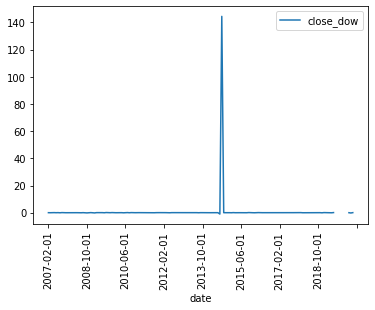

In [30]:
dow_bond.plot(y=['close_dow', clo], x='date', rot=90)

plt.show()